In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c walmart-recruiting-store-sales-forecasting

  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 868MB/s]


In [ ]:
! unzip walmart-recruiting-store-sales-forecasting
! unzip train.csv.zip
! unzip test.csv.zip
! unzip features.csv.zip

Archive:  walmart-recruiting-store-sales-forecasting.zip
replace features.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  features.csv.zip
  inflating: features.csv            


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df = train.merge(stores, on='Store', how='left')
df = df.merge(features, on=['Store', 'Date'], how='left')

In [ ]:
!pip install mlflow dagshub
import mlflow
import dagshub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
dagshub.init(repo_owner='mr-master-afk', repo_name='scaling-meme', mlflow=True)

Initialized MLflow to track repo "mr-master-afk/scaling-meme"

Repository mr-master-afk/scaling-meme initialized!

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
#check if mergged holidays are the same
(df['IsHoliday_x'] != df['IsHoliday_y']).sum()


np.int64(0)

In [ ]:
df.isnull().sum().sum()

np.int64(1422431)

In [ ]:
experiment_name = "LightGBM"
run_name = "LightGBM_cleaning"

In [ ]:
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name=run_name):
    mlflow.log_param("missing_handling_markdown", "fillna(0)")
    mlflow.log_param("missing_handling_CPI_Unemployment", "interpolate linear both")
    mlflow.log_param("holiday_encoded", True)
    mlflow.log_param("type_label_encoded", True)
    mlflow.log_metric("total_missing_after_cleaning", 0)  # Since we filled them
    mlflow.log_metric("total_initial_missing_estimate", df.isnull().sum().sum())
mlflow.end_run()

🏃 View run LightGBM_cleaning at: https://dagshub.com/mr-master-afk/scaling-meme.mlflow/#/experiments/0/runs/a983d8adcac54f57be4fc16c5514ffa2
🧪 View experiment at: https://dagshub.com/mr-master-afk/scaling-meme.mlflow/#/experiments/0


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import gc # Garbage Collector

# --- 1. Configuration ---
# Define paths and constants for easy management
DATA_PATHS = {
    'train': 'train.csv.zip',
    'features': 'features.csv.zip',
    'stores': 'stores.csv',
    'test': 'test.csv.zip',
}
LGBM_PARAMS = {
    'objective': 'regression_l1',  # Mean Absolute Error
    'metric': 'mae',
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'lambda_l1': 0.5,
    'lambda_l2': 0.5,
    'num_leaves': 50,
    'verbose': -1,
    'n_jobs': -1,  # Use all available CPUs
    'seed': 42,
    'boosting_type': 'gbdt',
}
CATEGORICAL_FEATURES = ['Store', 'Dept', 'IsHoliday', 'Type_encoded', 'Year', 'Month', 'DayOfWeek']
TARGET_COL = 'Weekly_Sales'
VALIDATION_WEEKS = 30 # Number of weeks to use for validation

In [ ]:
with mlflow.start_run(run_name="LightGBM_FeatureEngineering"):
    mlflow.log_param("date_features", ["Year", "Month", "WeekOfYear", "DayOfMonth", "DayOfWeek"])
    mlflow.log_param("markdown_fill", "all MarkDown1-5 set to 0")
    mlflow.log_param("categorical_features_used", CATEGORICAL_FEATURES)
    mlflow.log_param("sorted_for_interpolation", True)
mlflow.end_run()

🏃 View run LightGBM_FeatureEngineering at: https://dagshub.com/mr-master-afk/scaling-meme.mlflow/#/experiments/0/runs/980556f9d5a64ed3a0398bf640e1d822
🧪 View experiment at: https://dagshub.com/mr-master-afk/scaling-meme.mlflow/#/experiments/0


# Preprocessing, Feature Engineering and Training

Loading and merging data...
Merged Train shape: (421570, 16)
Merged Test shape: (115064, 15)
Categorical feature 'Type' encoded.

Training model with validation...
Train set size: (332778, 19)
Validation set size: (88792, 19)
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1880.07

Validation WMAE Score: 1914.9953

Retraining model on full dataset...
Retraining complete.
Creating submission file...
Submission file 'submission_lightgbm.csv' created successfully.
               Id  Weekly_Sales
0  1_1_2012-11-02  23352.284227
1  1_1_2012-11-09  21710.782443
2  1_1_2012-11-16  20871.307009
3  1_1_2012-11-23  23030.475291
4  1_1_2012-11-30  23078.632409


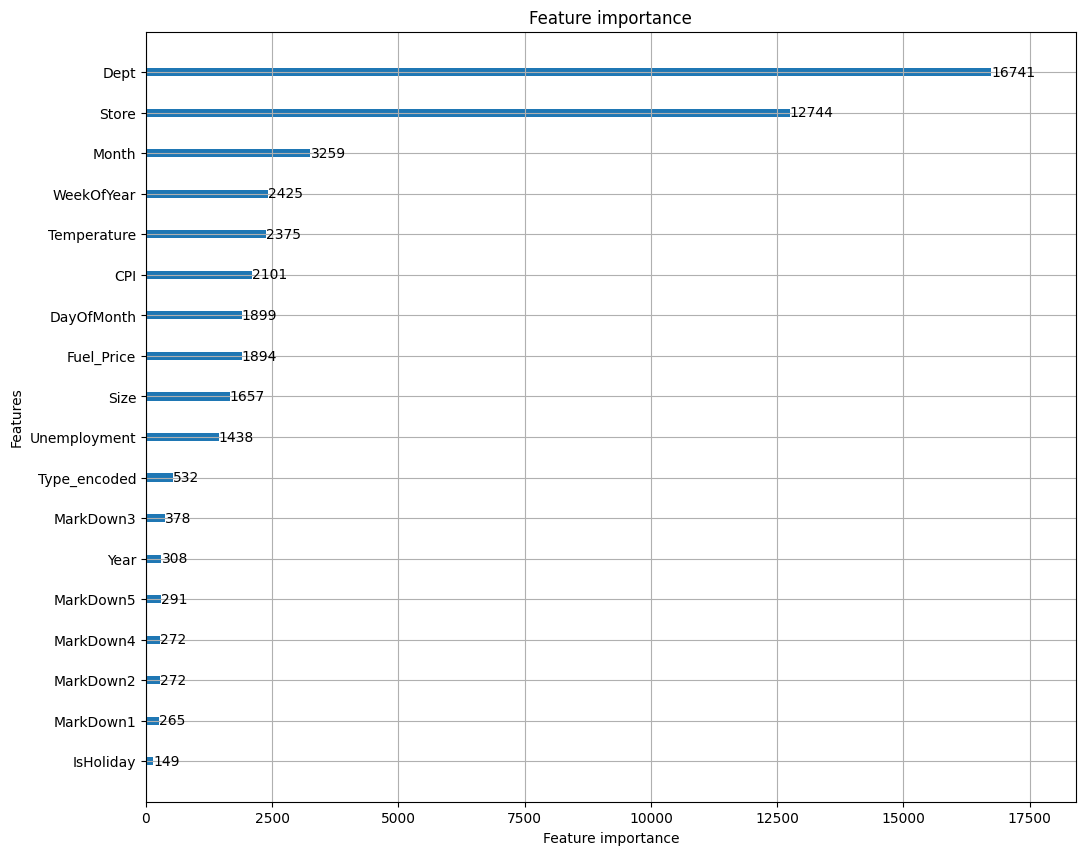

In [ ]:
# --- 2. Custom Evaluation Metric ---
def wmae(y_true, y_pred, is_holiday):
    """Calculates the Weighted Mean Absolute Error (WMAE)."""
    weights = np.where(is_holiday, 5, 1)
    error = np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)
    return error

# --- 3. Pipeline Functions ---
def load_and_merge_data(paths: dict) -> (pd.DataFrame, pd.DataFrame):
    """
    Loads data from specified paths and merges them into train and test sets.

    Args:
        paths (dict): A dictionary containing file paths for train, test, features, and stores.

    Returns:
        A tuple containing the merged training and testing DataFrames.
    """
    print("Loading and merging data...")
    try:
        train_df = pd.read_csv(paths['train'])
        features_df = pd.read_csv(paths['features'])
        stores_df = pd.read_csv(paths['stores'])
        test_df = pd.read_csv(paths['test'])
    except FileNotFoundError as e:
        print(f"Error: {e}. Please check file paths.")
        return None, None

    # Merge features and stores
    features_df = features_df.merge(stores_df, on='Store', how='left')

    # Merge with main train/test data
    train_df = train_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
    test_df = test_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

    print(f"Merged Train shape: {train_df.shape}")
    print(f"Merged Test shape: {test_df.shape}")
    return train_df, test_df

def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Performs preprocessing: creates date features and handles missing values.

    Args:
        df (pd.DataFrame): Input DataFrame (either train or test).

    Returns:
        Processed DataFrame.
    """
    # Create date-based features
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
    df['DayOfMonth'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek

    # Handle missing values
    markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
    df[markdown_cols] = df[markdown_cols].fillna(0)

    # Sort for correct interpolation
    df = df.sort_values(by=['Store', 'Dept', 'Date'])
    df['CPI'] = df['CPI'].interpolate(method='linear', limit_direction='both')
    df['Unemployment'] = df['Unemployment'].interpolate(method='linear', limit_direction='both')

    # Encode 'IsHoliday'
    df['IsHoliday'] = df['IsHoliday'].astype(int)

    return df

def encode_categorical_features(train_df: pd.DataFrame, test_df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame, LabelEncoder):
    """
    Encodes the 'Type' column using LabelEncoder.

    Args:
        train_df (pd.DataFrame): The training DataFrame.
        test_df (pd.DataFrame): The testing DataFrame.

    Returns:
        A tuple containing the modified train_df, test_df, and the fitted LabelEncoder.
    """
    le = LabelEncoder()
    train_df['Type_encoded'] = le.fit_transform(train_df['Type'])
    test_df['Type_encoded'] = le.transform(test_df['Type'])

    train_df = train_df.drop('Type', axis=1)
    test_df = test_df.drop('Type', axis=1)

    print("Categorical feature 'Type' encoded.")
    return train_df, test_df, le

def train_evaluate(train_df: pd.DataFrame, params: dict, cat_features: list, target_col: str, val_weeks: int) -> lgb.LGBMRegressor:
    """
    Splits data, trains an LGBM model with early stopping, and evaluates it.

    Args:
        train_df (pd.DataFrame): The full training DataFrame.
        params (dict): Parameters for the LightGBM model.
        cat_features (list): List of categorical feature names.
        target_col (str): The name of the target variable.
        val_weeks (int): Number of weeks to use for the validation set.

    Returns:
        The trained LightGBM model.
    """
    print("\nTraining model with validation...")
    features = [col for col in train_df.columns if col not in ['Date', target_col, 'Type']]

    # Time-based split for validation
    validation_cutoff_date = train_df['Date'].max() - pd.to_timedelta(val_weeks * 7, unit='d')
    X_train = train_df[train_df['Date'] <= validation_cutoff_date][features]
    y_train = train_df[train_df['Date'] <= validation_cutoff_date][target_col]
    X_val = train_df[train_df['Date'] > validation_cutoff_date][features]
    y_val = train_df[train_df['Date'] > validation_cutoff_date][target_col]
    val_is_holiday = train_df[train_df['Date'] > validation_cutoff_date]['IsHoliday']

    print(f"Train set size: {X_train.shape}")
    print(f"Validation set size: {X_val.shape}")

    # Initialize and train model
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='mae',
              callbacks=[lgb.early_stopping(100, verbose=True)],
              categorical_feature=cat_features)

    # Evaluate with custom metric
    val_preds = model.predict(X_val)
    wmae_score = wmae(y_val, val_preds, val_is_holiday)
    print(f"\nValidation WMAE Score: {wmae_score:.4f}")

    # Display feature importance
    lgb.plot_importance(model, figsize=(12, 10), max_num_features=20)

    return model, val_preds, y_val, val_is_holiday


def retrain_and_predict(initial_model: lgb.LGBMRegressor, train_df: pd.DataFrame, test_df: pd.DataFrame, params: dict, cat_features: list, target_col: str) -> np.ndarray:
    """
    Retrains the model on the full training data and makes predictions on the test set.

    Args:
        initial_model (lgb.LGBMRegressor): The model trained with early stopping.
        train_df (pd.DataFrame): The full training DataFrame.
        test_df (pd.DataFrame): The test DataFrame.
        params (dict): Parameters for the LightGBM model.
        cat_features (list): List of categorical feature names.
        target_col (str): The name of the target variable.

    Returns:
        An array of predictions for the test set.
    """
    print("\nRetraining model on full dataset...")
    features = [col for col in train_df.columns if col not in ['Date', target_col, 'Type']]
    X_full_train = train_df[features]
    y_full_train = train_df[target_col]
    X_test = test_df[features]

    # Use best iteration from the initial training
    best_iteration = initial_model.best_iteration_ if initial_model.best_iteration_ else params['n_estimators']
    final_params = params.copy()
    final_params['n_estimators'] = best_iteration

    # Train the final model
    final_model = lgb.LGBMRegressor(**final_params)
    final_model.fit(X_full_train, y_full_train, categorical_feature=cat_features)
    print("Retraining complete.")

    # Predict on test data
    test_preds = final_model.predict(X_test)
    return test_preds

def create_submission(test_df: pd.DataFrame, predictions: np.ndarray, filename: str):
    """
    Creates and saves the submission file.

    Args:
        test_df (pd.DataFrame): The test DataFrame with original columns.
        predictions (np.ndarray): The model's predictions.
        filename (str): The name for the output CSV file.
    """
    print("Creating submission file...")
    submission_df = pd.DataFrame()
    submission_df['Id'] = test_df['Store'].astype(str) + '_' + test_df['Dept'].astype(str) + '_' + test_df['Date'].dt.strftime('%Y-%m-%d')
    submission_df['Weekly_Sales'] = predictions

    # Sales cannot be negative
    submission_df.loc[submission_df['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0

    submission_df.to_csv(filename, index=False)
    print(f"Submission file '{filename}' created successfully.")
    print(submission_df.head())

# --- 4. Main Execution Workflow ---
def main():
    """Main function to run the entire ML pipeline."""
    # Step 1: Load and merge data
    train_df, test_df = load_and_merge_data(DATA_PATHS)
    if train_df is None:
        return

    # Step 2: Preprocess both datasets
    # Use .copy() to avoid SettingWithCopyWarning
    train_processed = preprocess_data(train_df.copy())
    test_processed = preprocess_data(test_df.copy())

    # Step 3: Encode categorical features
    train_processed, test_processed, _ = encode_categorical_features(train_processed, test_processed)

    # Step 4: Train initial model and evaluate
    model, val_preds, y_val, val_is_holiday = train_evaluate(
        train_df=train_processed,
        params=LGBM_PARAMS,
        cat_features=CATEGORICAL_FEATURES,
        target_col=TARGET_COL,
        val_weeks=VALIDATION_WEEKS
    )

    # Step 5: Retrain on full data and predict on test set
    predictions = retrain_and_predict(
        initial_model=model,
        train_df=train_processed,
        test_df=test_processed,
        params=LGBM_PARAMS,
        cat_features=CATEGORICAL_FEATURES,
        target_col=TARGET_COL
    )

    # Step 6: Create submission file
    create_submission(test_processed, predictions, 'submission_lightgbm.csv')

    # Clean up memory
    gc.collect()
    return model, predictions, train_processed, test_processed, val_preds, y_val, val_is_holiday

if __name__ == "__main__":
    model, predictions, train_processed, test_processed,val_preds, y_val, val_is_holiday = main()

# Final model

In [ ]:
import mlflow
import mlflow.lightgbm

# Extract true target values and IsHoliday for the validation set
validation_cutoff_date = train_processed['Date'].max() - pd.to_timedelta(VALIDATION_WEEKS * 7, unit='d')
y_true_val = train_processed[train_processed['Date'] > validation_cutoff_date]['Weekly_Sales']
is_holiday_val = train_processed[train_processed['Date'] > validation_cutoff_date]['IsHoliday']

# Compute WMAE
wmae_score = wmae(y_val, val_preds, val_is_holiday)

import mlflow
import joblib
import os
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name="LightGBM_model"):
    # Log WMAE score
    mlflow.log_metric("wmae", wmae_score)
    mlflow.log_params(LGBM_PARAMS)
    # Save model to local file
    os.makedirs("models", exist_ok=True)
    joblib.dump(model, "models/lightgbm_model.pkl")

    # Log model as an artifact (this works with DagsHub)
    mlflow.log_artifact("models/lightgbm_model.pkl", artifact_path="model")

    print("✅ Model logged as artifact to MLflow (DagsHub compatible)")



✅ Model logged as artifact to MLflow (DagsHub compatible)
🏃 View run LightGBM_model at: https://dagshub.com/mr-master-afk/scaling-meme.mlflow/#/experiments/0/runs/f97a74e822564e08b304cc352d9f79e9
🧪 View experiment at: https://dagshub.com/mr-master-afk/scaling-meme.mlflow/#/experiments/0
